# **Regresi Linear Sederhana**
*Menggunakan Python*

Contoh kasus: Prediksi Gaji berdasarkan Tahun Bekerja
Dataset dapat diakses di: https://drive.google.com/file/d/1aSX6KOE2ziTOiapQgbWuGiqzGK3Ow594/view?usp=sharing

Tahapan dalam penggunaan **Simple Linear Regression** di artikel kali ini adalah sebagai berikut:
1. Import Library 
2. Load Dataset
3. Check the General Information
4. Handling Missing Values
5. Exploratory Data Analysis (EDA)
6. Splitting Data
7. Modelling
8. Evaluation
9. Prediction

# 1.  Import Library
Numpy : 

In [1]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 2. Load Dataset

In [2]:
# Impor dataset
url = 'https://drive.google.com/file/d/1aSX6KOE2ziTOiapQgbWuGiqzGK3Ow594/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

dataset = pd.read_csv(dwn_url)
print(dataset.head())

   Tahun_bekerja   Gaji
0            1.1  39343
1            1.3  46205
2            1.5  37731
3            2.0  43525
4            2.2  39891


# 3. Check the General Information

Melihat informasi Umum Ini digunakan untuk mengenali data kita.

In [3]:
#untuk melihat ukuran data
dataset.shape

(30, 2)

In [4]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tahun_bekerja  30 non-null     float64
 1   Gaji           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
dataset.describe()

,Tahun_bekerja,Gaji
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# 4. Handling Missing Values

In [6]:
#Mencari dan menangani missing values.
#Ternyata data kita tidak ada missing values.
dataset.isnull().sum()

Tahun_bekerja    0
Gaji             0
dtype: int64

# 5. Exploratory Data Analysis (EDA)

digunakan untuk lebih mengenal data kita dan menemukan insights dari data.

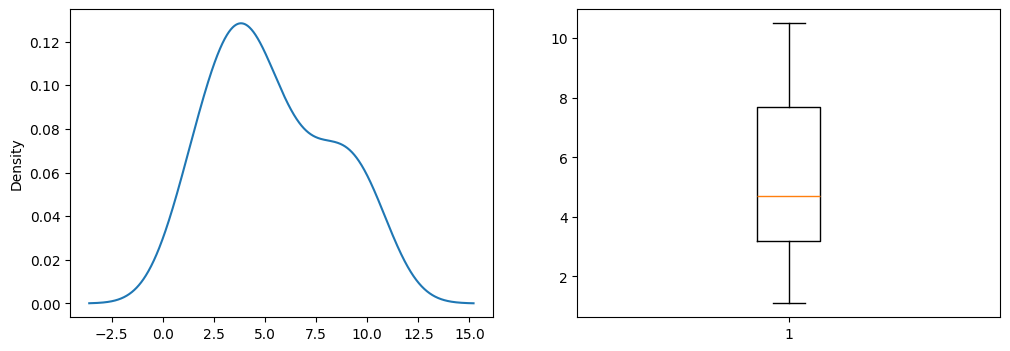

In [7]:
#Melakukan Exploratory Data Analysis (EDA) 
#Univariate analysis Tahun_bekerja.
#Melihat distribusi dari Tahun_bekerja.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Tahun_bekerja'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Tahun_bekerja'])
plt.show()




*  Dapat dilihat bahwa mean dan median dari Tahun_bekerja terpusat di sekitar nilai 2.5-5.
*  tidak terdapat outlier/pencilan data yang bisa dilihat di boxplot.



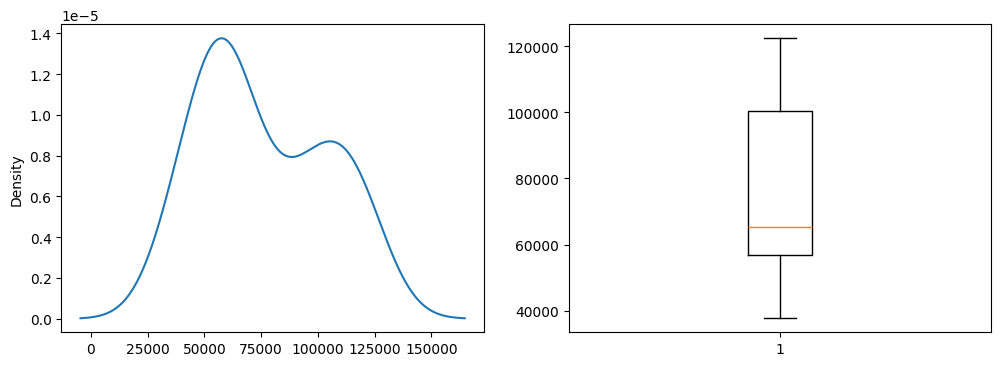

In [8]:
#Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan insights dari data.
#Univariate analysis Gaji.
#Melihat distribusi dari Gaji.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Gaji'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Gaji'])
plt.show()



*   Dapat dilihat bahwa mean dan median dari Tahun_bekerja terpusat di sekitar nilai 50000.

*   tidak terdapat outlier/pencilan data yang bisa dilihat di boxplot.



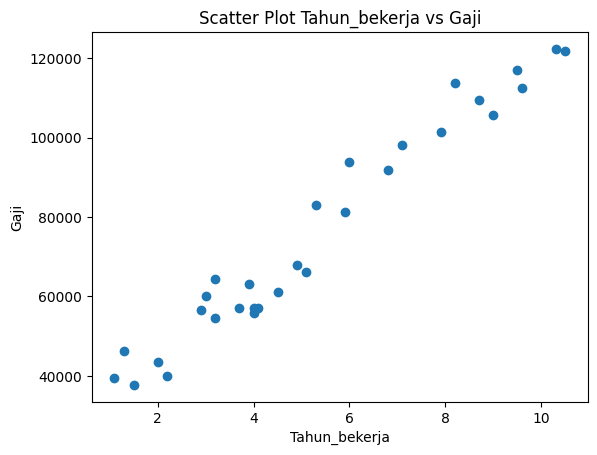

In [9]:
#Bivariate analysis Tahun_bekerja dan Gaji.
#Menggunakan scatter plot.
plt.scatter(dataset['Tahun_bekerja'], dataset['Gaji'])
plt.xlabel('Tahun_bekerja')
plt.ylabel('Gaji')
plt.title('Scatter Plot Tahun_bekerja vs Gaji')
plt.show()

In [10]:
#Mengetahui nilai korelasi dari Tahun_bekerja dan Gaji.
dataset.corr()

,Tahun_bekerja,Gaji
Tahun_bekerja,1.000000,0.978242
Gaji,0.978242,1.000000


<Axes: >

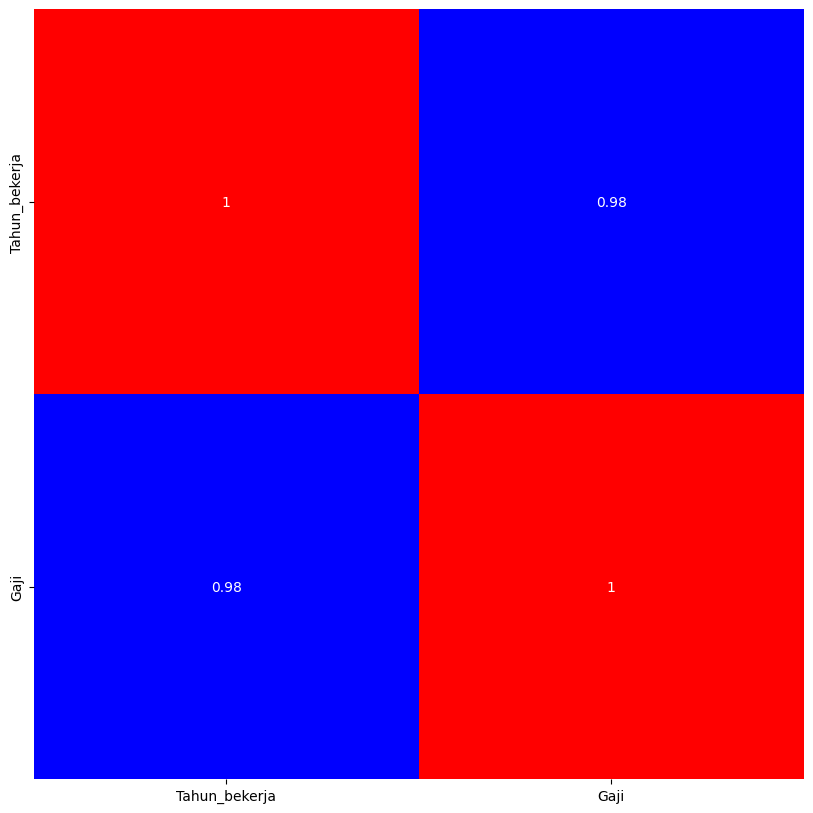

In [11]:
#corelasi penuh warna merah dan putih tidak
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap='bwr', cbar=False, annot=True, square=True)

# 6. Splitting Data

In [12]:
#ambil konten data saja, buang header nya
#X sebagai variabel indepedent/variable bebas/variabel independent/ predictor, yakni Tahun bekerja
X = dataset.iloc[:, 0:1].values
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
#ambil konten data saja, buang header nya
#Y sebagai variabel dependent/variable terikat/variabel tak bebas/ response, yakni Gaji
Y = dataset.iloc[:, 1].values
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [14]:
# Membagi data menjadi Training Set dan Test Set
# import sckit learn  untuk Machine Learning
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_train)

(21, 1)
[[ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


# 7. Modelling

In [15]:
# panggil modul LinearRegression untuk menjalankan regresi liear
from sklearn.linear_model import LinearRegression
# membuat objek regresi linear
lin_reg = LinearRegression()
# membangun model (training model dari data set yang sudah kita split)
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [24]:
import joblib

In [25]:
# ekspor model ke file 'lin_reg_model.joblib'
joblib.dump(lin_reg, 'lin_reg_model.joblib')

['lin_reg_model.joblib']

In [16]:
# cari tau nilai slope/koefisien (θi ) dan intercept (θ0).
# ŷ=θ0+θiΧi+Ɛi

print(lin_reg.coef_)
print(lin_reg.intercept_)

[9360.26128619]
26777.391341197625


8. Evaluation

In [17]:
# memprediksi model dengan test set(melakukan proses testing)
Y_prediksi = lin_reg.predict(X_test)

In [18]:
#Lakukan evaluasi performa
#tampilkan hasil dari data aktual dan data prediksi
df = pd.DataFrame({'aktual': Y_test, 'Prediksi': Y_prediksi})
print(df)

   aktual       Prediksi
0   37731   40817.783270
1  122391  123188.082589
2   57081   65154.462615
3   63218   63282.410357
4  116969  115699.873560
5  109431  108211.664531
6  112635  116635.899689
7   55794   64218.436486
8   83088   76386.776158


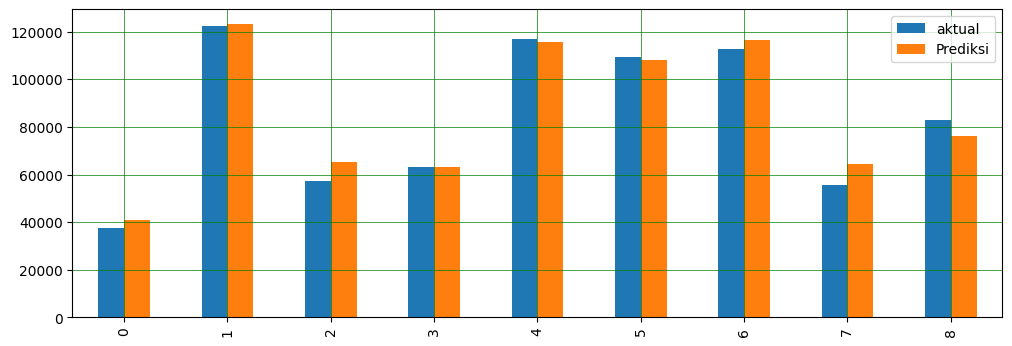

In [19]:
#visualisasi galat/ selisih data aktual dengan data prediksi
df.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai MAE, MSE dan RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_prediksi))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_prediksi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_prediksi)))

Mean Absolute Error: 3737.417861878896
Mean Squared Error: 23370078.800832972
Root Mean Squared Error: 4834.260936361728


Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja (training set)')

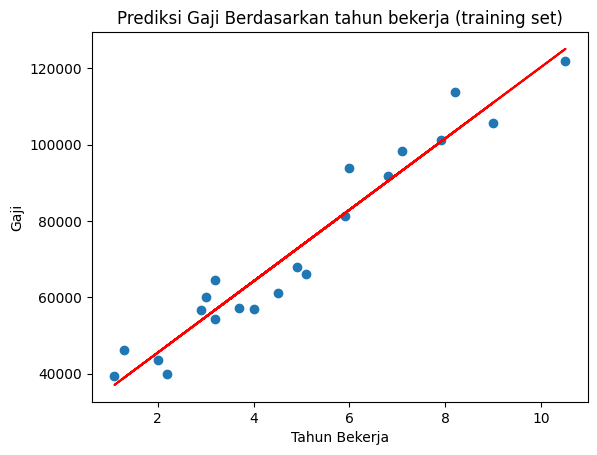

In [21]:
#visualisasi data training

plt.scatter(X_train, Y_train)
plt.plot(X_train, lin_reg.predict(X_train), c='red')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja (training set)')

Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

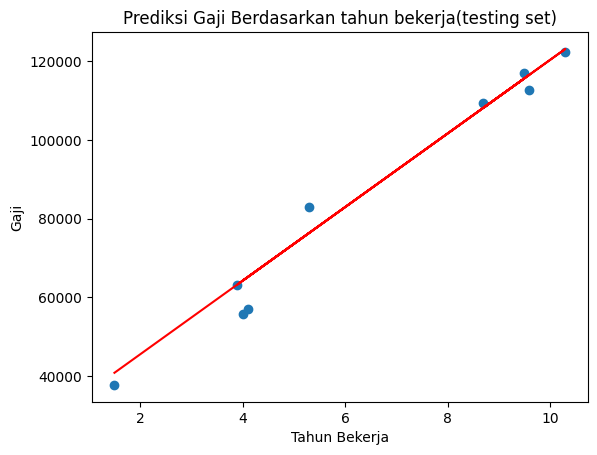

In [22]:
#visualisasi data dari data testing
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_prediksi, c='r')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

# 9. Prediction

In [23]:
# mencoba studi kasus, misal kita prediksi gaji seseorang yang telah bekerja selama 2.7, 5.5, 7.5 tahun
print('Gaji Seseorang setelah bekerja selama 2.7 tahun adalah',lin_reg.predict([[2.7]]))
print('Gaji Seseorang setelah bekerja selama 5.5 tahun adalah',lin_reg.predict([[5.5]]))
print('Gaji Seseorang setelah bekerja selama 7.5 tahun adalah',lin_reg.predict([[7.5]]))

Gaji Seseorang setelah bekerja selama 2.7 tahun adalah [52050.09681392]
Gaji Seseorang setelah bekerja selama 5.5 tahun adalah [78258.82841526]
Gaji Seseorang setelah bekerja selama 7.5 tahun adalah [96979.35098765]


# References

1. https://megabagus.id 
2. https://medium.com/@adiptamartulandi
3. https://stackabuse.com/linear-regression-in-python-with-scikit-learn/